***
## Table of Contents
<br>
    <ol><h2><a href='#0' style="text-decoration : none; color : #000000;">0. Loading and Analyzing data of all three experiments</a></h2> </ol>
    <br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. Models with selected original features</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br> 

<ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. Feature Transformation with feature selection </a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. Feature Transformation with PCA</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. Oversampling</a></h2>
        <ul>
            <a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#4.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#5' style="text-decoration : none; color : #000000;">5. Undersampling</a></h2>
        <ul>
            <a href='#5.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#5.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#5.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#6' style="text-decoration : none; color : #000000;">6. With Cookies</a></h2>
        <ul>
            <a href='#6.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#6.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#6.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import researchpy as rp

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
# from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score,precision_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import featuretools as ft

from scipy import stats

Using TensorFlow backend.


In [2]:
### Function to plot Feature Importance
def feat_impt_plot(feat_impt,width_s=1000,height_s=1000,title=''):
    data = [go.Bar(x=feat_impt.values,y=feat_impt.index.values,text=np.round(feat_impt,4),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6,
            orientation='h'
        )]
    layout = go.Layout(title=title,autosize=False,
    width=width_s,
    height=height_s,
    xaxis=dict(title='Feature Importances',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(automargin=True))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    

### Function to generate Confusion Matrix
def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    return cm


### Function to eliminate columns with no values or only 1 unique values
def remove_feat(data):
    col_no_unique=[]
    for col in data.columns[:]:
        if len(data[col].value_counts())<=1:
#             print(col)
            col_no_unique.append(col)
    return col_no_unique


### Function to eliminate columns with more than 95% values 
def uni_value(data):
    lst=[]
    for col in data.columns[:]:
        lst.append([col,dict(data[col].value_counts()),data[col].value_counts().values[0]>=len(data)*0.95])
    col_values=pd.DataFrame(lst,columns=['Feature','Value_Counts','95_%_same_values'])
    col_values.set_index('Feature',drop=True,inplace=True)
    del lst
    return col_values


### Identify categorical and numerical data
def check_cat(data):
    cat_var=[]
    num_var=[]
    for col in data.columns:
        if col!='Target':
            if len(data[col].value_counts())==2:
                cat_var.append(col)
            else:
                num_var.append(col)
    return cat_var,num_var


### Generate statistics for numerical data
def num_stats(data,columns):
    lst=[]
    for col in columns:
        corr=stats.pointbiserialr(data[col],data.Target)[0]
        corr_p=stats.pointbiserialr(data[col],data.Target)[1]
        ttest=stats.ttest_ind(data[data.Target==1][col], data[data.Target==0][col], equal_var=False)[0]
        ttest_p=stats.ttest_ind(data[data.Target==1][col], data[data.Target==0][col], equal_var=False)[1]
        lst.append((corr,corr_p,ttest,ttest_p,col))
    stats_data=pd.DataFrame(lst,columns=['Pt. Biserial Corr','Pt. Biserial Corr p-val','ttest','ttest p-val','Feature'])
    stats_data.set_index('Feature',drop=True,inplace=True)
    stats_data.sort_values(by='ttest',inplace=True)
    del lst
    return stats_data


### Generate statistics for categorical data
def cat_stats(data,columns):
    lst=[]
    for col in columns:
        if col!='Target':
            table, results = rp.crosstab(data['Target'], data[col], prop= 'col', test= 'chi-square')
            x=results['results'].values.tolist()
            x.append(col)
            lst.append(x)
    chi_df=pd.DataFrame(lst,columns=['Pearson Chi-square','p-value','Cramers V','Feature'])
    chi_df.set_index('Feature',drop=True,inplace=True)
    chi_df.sort_values(by='Cramers V',ascending=False,inplace=True)
    del lst
    return chi_df


### Generate plot for class balance for categorical nature
def class_bal(data,title=''):
    d = [go.Bar(x=data.Target.value_counts().index.values,
               y=data.Target.value_counts().values,
               text=data.Target.value_counts().values,
               textposition = 'outside',
            )]
    layout = go.Layout(title=title,xaxis=dict(title='Domain Type',tickfont=dict(size=12,color='black')),
                    yaxis=dict(title='Number of Instances'))
    fig = go.Figure(data=d, layout=layout)
    iplot(fig)

### <a id='0' style="text-decoration : none; color : #000000;"> Loading and Analyzing data of all three experiments</a>

#### Javascript experiment

In [3]:
df_js=pd.read_csv('Javascript.csv',low_memory=False,index_col='domain')

cookie=[col for col in df_js.columns if 'number' in col]

df_js.rename(columns={'Malicious':'Target'},inplace=True)

df_js.drop(cookie,axis=1,inplace=True)

print("Shape of our dataset:",df_js.shape)

df_js.head()

Shape of our dataset: (43294, 401)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

#### HTML experiment

In [4]:
df_html=pd.read_csv('HTML.csv',index_col='domain')
df_html.drop(['Unnamed: 0'],axis=1,inplace=True)
print("Shape of our dataset:",df_html.shape)

df_html.head()

Shape of our dataset: (43491, 1461)


,a_charset_utf-8,a_count,a_download_download,a_hidden_true,a_href_.7z,a_href_.apk,a_href_.app,a_href_.asp,a_href_.aspx,a_href_.au,a_href_.avi,a_href_.b,a_href_.bin,a_href_.br,a_href_.bz2,a_href_.ca,a_href_.cat,a_href_.cc,a_href_.cfm,a_href_.cgi,a_href_.ch,a_href_.chn,a_href_.cl,a_href_.cms,a_href_.com,a_href_.csp,a_href_.css,a_href_.data,a_href_.de,a_href_.dmg,a_href_.do,a_href_.doc,a_href_.docx,a_href_.dot,a_href_.dz,a_href_.end,a_href_.exe,a_href_.fx,a_href_.gif,a_href_.gsp,a_href_.gz,a_href_.htm,a_href_.html,a_href_.i,a_href_.id,a_href_.io,a_href_.iso,a_href_.it,a_href_.jhtml,a_href_.jpeg,a_href_.jpg,a_href_.js,a_href_.jsf,a_href_.json,a_href_.jsp,a_href_.lnk,a_href_.m3u,a_href_.md,a_href_.me,a_href_.mhp,a_href_.mp3,a_href_.mp4,a_href_.mpl,a_href_.mvc,a_href_.net,a_href_.ogg,a_href_.org,a_href_.pcf,a_href_.pd,a_href_.pdf,a_href_.php,a_href_.phtml,a_href_.pk,a_href_.pl,a_href_.pls,a_href_.png,a_href_.prd,a_href_.pro,a_href_.rar,a_href_.rdf,a_href_.rf,a_href_.rss,a_href_.ru,a_href_.shtml,a_href_.spa,a_href_.svg,a_href_.swf,a_href_.tag,a_href_.tmpl,a_href_.tr,a_href_.tsp,a_href_.tv,a_href_.txt,a_href_.vid,a_href_.wml,a_href_.wmv,a_href_.x,a_href_.xhtml,a_href_.xls,a_href_.xlsx,a_href_.xml,a_href_.xxx,a_href_.xyz,a_href_.xz,a_href_.zip,a_href_0,a_href_0.1,a_href_0.2,a_href_absolute,a_href_ftp,a_href_http,a_href_https,a_href_irc,a_href_mailto,a_href_out_of_domain,a_href_relative,a_href_script_javascript,a_hreflang_am,a_hreflang_ar,a_hreflang_az,a_hreflang_bs,a_hreflang_ca,a_hreflang_cs,a_hreflang_de,a_hreflang_el,a_hreflang_en,a_hreflang_en-gb,a_hreflang_en-us,a_hreflang_es,a_hreflang_es-ES,a_hreflang_fi,a_hreflang_fr,a_hreflang_hu,a_hreflang_id,a_hreflang_it,a_hreflang_ja,a_hreflang_ko,a_hreflang_ml,a_hreflang_nl,a_hreflang_no,a_hreflang_pl,a_hreflang_pt,a_hreflang_pt-br,a_hreflang_ro,a_hreflang_ru,a_hreflang_sv,a_hreflang_tr,a_hreflang_und,a_hreflang_zh,a_hreflang_zh-hans,a_hreflang_zxx,a_lang_a1,a_lang_ar,a_lang_bg,a_lang_ca,a_lang_cs,a_lang_da,a_lang_de,a_lang_el,a_lang_en,a_lang_en-GB,a_lang_en-US,a_lang_es,a_lang_es-ES,a_lang_fi,a_lang_fr,a_lang_he,a_lang_hi,a_lang_hr,a_lang_hu,a_lang_id,a_lang_it,a_lang_ja,a_lang_ko,a_lang_nl,a_lang_pl,a_lang_pt,a_lang_ro,a_lang_ru,a_lang_sk,a_lang_sv,a_lang_th,a_lang_tr,a_lang_vi,a_lang_zh,a_referrerpolicy_unsafe-url,a_rel_ nofollow,a_rel_ noopener,a_rel_ noopener noreferrer,a_rel_ noreferrer noopener,"a_rel_""nofollow""",a_rel_#modal-overlay,a_rel_#modalExternalSiteCluetip,a_rel_#selectFiliale,a_rel_'nofollow',a_rel_0,a_rel_1,a_rel_10,a_rel_11,a_rel_12,a_rel_13,a_rel_14,a_rel_15,a_rel_16,a_rel_17,a_rel_2,a_rel_3,a_rel_4,a_rel_5,a_rel_6,a_rel_7,a_rel_8,a_rel_9,a_rel_<strong>@font-face Embedding</strong> - this free license allows you to embed the font in your websites with CSS.,a_rel_<strong>Commercial Desktop Use</strong> - this free license allows you to create commercial graphics and documents.,a_rel_Akamai-prefetch,a_rel_Dofollow,a_rel_F,a_rel_Lightbox,a_rel_Menu,a_rel_NOFOLLOW,a_rel__blank,a_rel_about,a_rel_accounts,a_rel_ajaxcontentarea,a_rel_alternate,a_rel_alternate noopener noreferrer,a_rel_archive,a_rel_article,a_rel_attachment,a_rel_author,a_rel_author external,a_rel_author source external,a_rel_blank,a_rel_bookmark,a_rel_bookmark noopener,a_rel_box,a_rel_canonical,a_rel_category,a_rel_category tag,a_rel_category tag noopener noreferrer,a_rel_chapter,a_rel_chartPopup nofollow,a_rel_cklog,a_rel_contact,a_rel_contents,a_rel_countrycontainer,a_rel_date,a_rel_ddsubmenuside1,a_rel_default,...,object_data_http,object_data_https,object_data_out_of_domain,object_data_relative,object_style_display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1;,object_style_display: none;,object_type_application/x-shockwave-flash,object_type_image/svg+xml,object_type_text/html,ol_count,optgroup_count,option_count,output_count,p_count,param_count,picture_count,pre_count,progress_count,q_count,s_count,samp_count,script_async

#### HTTP experiment

In [5]:
df_http=pd.read_csv('HTTP.csv',index_col='domain')

display(df_http.head())

print("Shape of our dataset:",df_http.shape)

,Target,http_header-access-control-origin_http:,http_header-access-control-origin_https:,http_header_access-control-allow-credentials,http_header_access-control-allow-methods_cancelupload,http_header_access-control-allow-methods_checkin,http_header_access-control-allow-methods_connect,http_header_access-control-allow-methods_debug,http_header_access-control-allow-methods_delete,http_header_access-control-allow-methods_get,http_header_access-control-allow-methods_head,http_header_access-control-allow-methods_link,http_header_access-control-allow-methods_mkcol,http_header_access-control-allow-methods_move,http_header_access-control-allow-methods_options,http_header_access-control-allow-methods_patch,http_header_access-control-allow-methods_post,http_header_access-control-allow-methods_propfind,http_header_access-control-allow-methods_prpatch,http_header_access-control-allow-methods_put,http_header_access-control-allow-methods_report,http_header_access-control-allow-methods_should,http_header_access-control-allow-methods_trace,http_header_access-control-allow-methods_unlink,http_header_access-control-allow-methods_update,http_header_access-control-custom_count,http_header_access-control-expose-headers_set_true,http_header_access-control-expose-total_count,http_header_access-control-max-age,http_header_cache-control_set_max-age,http_header_cache-control_set_must-revalidate,http_header_cache-control_set_no-cache,http_header_cache-control_set_no-store,http_header_cache-control_set_no-transform,http_header_cache-control_set_private,http_header_cache-control_set_proxy-revalidate,http_header_cache-control_set_public,http_header_cache-control_set_s-maxage,http_header_connection_close,http_header_connection_keep-alive,http_header_content-disposition_attachment,http_header_content-disposition_inline,http_header_content-encoding_br,http_header_content-encoding_compress,http_header_content-encoding_deflate,http_header_content-encoding_gzip,http_header_content-encoding_identify,http_header_content-language_aa,http_header_content-language_ae,http_header_content-language_af,http_header_content-language_ak,http_header_content-language_am,http_header_content-language_an,http_header_content-language_application/*,http_header_content-language_application/ecmascript,http_header_content-language_application/json,http_header_content-language_application/octet-stream,http_header_content-language_ar,http_header_content-language_as,http_header_content-language_audio/*,http_header_content-language_audio/mpeg,http_header_content-language_audio/ogg,http_header_content-language_av,http_header_content-language_ay,http_header_content-language_az,http_header_content-language_ba,http_header_content-language_be,http_header_content-language_bg,http_header_content-language_bh,http_header_content-language_bi,http_header_content-language_blocked-uri,http_header_content-language_bm,http_header_content-language_bn,http_header_content-language_bo,http_header_content-language_br,http_header_content-language_bs,http_header_content-language_ca,http_header_content-language_ce,http_header_content-language_ch,http_header_content-language_co,http_header_content-language_cr,http_header_content-language_cs,http_header_content-language_cu,http_header_content-language_cv,http_header_content-language_cy,http_header_content-language_da,http_header_content-language_de,http_header_content-language_disposition,http_header_content-language_document-uri,http_header_content-language_dv,http_header_content-language_dz,http_header_content-language_ee,http_header_content-language_effective-directive,http_header_content-language_el,http_header_content-language_en,http_header_content-language_eo,http_header_content-language_es,http_header_content-language_et,http_header_content-language_eu,http_header_content-language_fa,http_header_content-language_ff,http_header_content-language_fi,http_header_content-language_fj,http_header_content-language_fo,http_header_content-language_fr,http_header_co

Shape of our dataset: (45856, 672)


In [6]:
col_js_no_uni=remove_feat(df_js)
col_html_no_uni=remove_feat(df_html)
col_http_no_uni=remove_feat(df_http)

In [7]:
print("{} columns in JavaScript experiment with all missing or only one unique value".format(len(col_js_no_uni)))
print("{} columns in HTML experiment with all missing or only one unique value".format(len(col_html_no_uni)))
print("{} columns in HTTP experiment with all missing or only one unique value".format(len(col_http_no_uni)))

113 columns in JavaScript experiment with all missing or only one unique value
0 columns in HTML experiment with all missing or only one unique value
400 columns in HTTP experiment with all missing or only one unique value


In [8]:
df_js.drop(col_js_no_uni,axis=1,inplace=True)
df_html.drop(col_html_no_uni,axis=1,inplace=True)
df_http.drop(col_http_no_uni,axis=1,inplace=True)

In [9]:
print("Shape of JavaScript experiemtn after dropping them:",df_js.shape)
print("Shape of HTML experiemtn after dropping them:",df_html.shape)
print("Shape of HTTP experiemtn after dropping them:",df_http.shape)

Shape of JavaScript experiemtn after dropping them: (43294, 288)
Shape of HTML experiemtn after dropping them: (43491, 1461)
Shape of HTTP experiemtn after dropping them: (45856, 272)


In [10]:
print("{} missing values in JavaScript".format(sum(df_js.isnull().sum())))
print("{} missing values in HTML".format(sum(df_html.isnull().sum())))
print("{} missing values in HTTP".format(sum(df_http.isnull().sum())))

0 missing values in JavaScript
0 missing values in HTML
0 missing values in HTTP


In [11]:
col_js_95=uni_value(df_js)
col_html_95=uni_value(df_html)
col_http_95=uni_value(df_http)

In [12]:
print("{} columns in JavaScript experiment with more than 95% same values".format(len(col_js_95[col_js_95['95_%_same_values']==True])))
print("{} columns in HTML experiment with more than 95% same values".format(len(col_html_95[col_html_95['95_%_same_values']==True])))
print("{} columns in HTTP experimentwith more than 95% same values".format(len(col_http_95[col_http_95['95_%_same_values']==True])))

234 columns in JavaScript experiment with more than 95% same values
1297 columns in HTML experiment with more than 95% same values
245 columns in HTTP experimentwith more than 95% same values


In [13]:
### Lets drop those columns
df_js.drop(col_js_95[col_js_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

df_html.drop(col_html_95[col_html_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

df_http.drop(col_http_95[col_http_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

In [14]:
print("Shape of JavaScript experiment after dropping them:",df_js.shape)
print("Shape of HTML experiment after dropping them:",df_html.shape)
print("Shape of HTTP experiment after dropping them:",df_http.shape)

Shape of JavaScript experiment after dropping them: (43294, 54)
Shape of HTML experiment after dropping them: (43491, 164)
Shape of HTTP experiment after dropping them: (45856, 27)


#### Malicious/Non-malicious class balance

In [15]:
class_bal(df_js,'JavaScript experiment')
class_bal(df_html,'HTML experiment')
class_bal(df_http,'HTTP experiment')

#### Analyzing the categorical and numerical features

In [16]:
cat_var_js,num_var_js=check_cat(df_js)
cat_var_http,num_var_http=check_cat(df_http)
cat_var_html,num_var_html=check_cat(df_html)

In [17]:
df_js.Target=df_js.Target.apply(lambda x: 1 if x=='Malicious' else 0)
df_html.Target=df_html.Target.apply(lambda x: 1 if x=='Malicious' else 0)
df_http.Target=df_http.Target.apply(lambda x: 1 if x=='Malicious' else 0)

In [18]:
print("Stats for numerical features for JavaScript experiment\n")
num_stats_js=num_stats(df_js,num_var_js)
display(num_stats_js)
print("\nStats for Categorical features for JavaScript experiment\n")
cat_stats_js=cat_stats(df_js,cat_var_js)
display(cat_stats_js)

Stats for numerical features for JavaScript experiment



,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
dom_function_document.getElementsByTagName(,-0.206833,0.000000e+00,-94.422955,0.000000e+00
dom_function_document.createElement(,-0.154604,9.233651e-230,-72.422095,0.000000e+00
js_function_.getTime(,-0.149504,8.006211e-215,-70.045384,0.000000e+00
dom_function_window.addEventListener(,-0.107093,1.299881e-110,-51.397683,0.000000e+00
js_function_.split(,-0.097541,5.300145e-92,-46.252895,0.000000e+00
js_function_Math.random(,-0.094978,2.620317e-87,-44.513654,0.000000e+00
js_function_.setTime(,-0.083818,2.410642e-68,-41.813198,0.000000e+00
js_function_.replace(,-0.087844,6.536777e-75,-38.924200,0.000000e+00
js_function_.indexOf(,-0.075600,6.618535e-56,-36.469099,9.453374e-287



Stats for Categorical features for JavaScript experiment



,Pearson Chi-square,p-value,Cramers V
Feature,,,


In [19]:
print("Stats for numerical features for HTML experiment\n")
num_stats_html=num_stats(df_html,num_var_html)
display(num_stats_html)
print("\nStats for Categorical features for HTML experiment\n")
cat_stats_html=cat_stats(df_html,cat_var_html)
display(cat_stats_html)

Stats for numerical features for HTML experiment



,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
script_src_.js,-0.319546,0.000000e+00,-142.596194,0.000000e+00
script_count,-0.315619,0.000000e+00,-142.448699,0.000000e+00
script_src_relative,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_absolute,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_https,-0.271077,0.000000e+00,-126.553948,0.000000e+00
script_async_true,-0.245742,0.000000e+00,-118.214320,0.000000e+00
link_rel_canonical,-0.276351,0.000000e+00,-114.117813,0.000000e+00
div_count,-0.231558,0.000000e+00,-113.026088,0.000000e+00
script_type_text/javascript,-0.264055,0.000000e+00,-111.582561,0.000000e+00



Stats for Categorical features for HTML experiment



,Pearson Chi-square,p-value,Cramers V
Feature,,,


In [20]:
print("Stats for numerical features for HTTP experiment\n")
num_stats_http=num_stats(df_http,num_var_http)
display(num_stats_http)
print("\nStats for Categorical features for HTTP experiment\n")
cat_stats_http=cat_stats(df_http,cat_var_http)
display(cat_stats_http)

Stats for numerical features for HTTP experiment



,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
http_header_marco_contenttext,-0.457291,0.000000e+00,-72.017274,0.000000e+00
http_header_x-cintent-type-options_nosniff,-0.140954,3.993026e-202,-64.192673,0.000000e+00
http_header_strict-transport-security_max-age,-0.137176,1.926210e-191,-61.878219,0.000000e+00
http_header_content-length,-0.072521,1.598452e-54,-19.896051,2.042365e-86



Stats for Categorical features for HTTP experiment



,Pearson Chi-square,p-value,Cramers V
Feature,,,
http_header_content-encoding_gzip,9686.2477,0.0,0.4596
http_header_content-language_text/html,9548.2797,0.0,0.4563
http_header_vary_accept,5024.0796,0.0,0.3310
http_header_vary_accept-encoding,4979.9830,0.0,0.3295
http_header_connection_keep-alive,4052.6234,0.0,0.2973
http_header_transfer-encoding_chunked,3995.7784,0.0,0.2952
http_header_cache-control_set_max-age,1868.6053,0.0,0.2019
http_header_server_nginx,1404.5624,0.0,0.1750
http_header_x-xss-enabled,771.5071,0.0,0.1297


### We will select the top 20 features from each of the methods

In [21]:
fin_col=num_stats_js.index.values[0:20].tolist()+cat_stats_js.index.values[0:20].tolist() + num_stats_html.index.values[0:20].tolist()+cat_stats_html.index.values[0:20].tolist() + num_stats_http.index.values[0:20].tolist()+cat_stats_http.index.values[0:20].tolist()

### Final feature list

In [22]:
fin_col

['dom_function_document.getElementsByTagName(',
 'dom_function_document.createElement(',
 'js_function_.getTime(',
 'dom_function_window.addEventListener(',
 'js_function_.split(',
 'js_function_Math.random(',
 'js_function_.setTime(',
 'js_function_.replace(',
 'js_function_.indexOf(',
 'js_function_Math.floor(',
 'js_function_decodeURIComponent(',
 'js_function_.match(',
 'js_function_JSON.parse(',
 'js_function_.pop(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_encodeURIComponent(',
 'js_function_.test(',
 'js_function_.apply(',
 'js_function_.substr',
 'script_src_.js',
 'script_count',
 'script_src_relative',
 'script_src_absolute',
 'script_src_https',
 'script_async_true',
 'link_rel_canonical',
 'div_count',
 'script_type_text/javascript',
 'script_src_out_of_domain',
 'iframe_count',
 'a_count',
 'a_href_relative',
 'a_href_absolute',
 'a_href_out_of_domain',
 'img_count',
 'meta_http-equiv_X-UA-Compatible',
 'link_href_https',
 'img_src_relative',
 'img_s

### Merge columns on index

In [23]:
df_int=pd.merge(df_js,df_html,left_index=True,right_index=True)

df=pd.merge(df_int,df_http,left_index=True,right_index=True)

df['Target']=df[['Target_x','Target_y','Target']].apply(max,axis=1)

### Final feature-set

In [24]:
fin_col.append('Target')

df_sel=df[fin_col]

display(df_sel.shape)
df_sel.head()

(39183, 65)

,dom_function_document.getElementsByTagName(,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,http_header_marco_contenttext,http_header_x-cintent-type-options_nosniff,http_header_strict-transport-security_max-age,http_header_content-length,http_header_content-encoding_gzip,http_header_content-language_text/html,http_header_vary_accept,http_header_vary_accept-encoding,http_header_connection_keep-alive,http_header_transfer-encoding_chunked,http_header_cache-control_set_max-age,http_header_server_nginx,http_header_x-xss-enabled,http_header_cache-control_set_private,http_header_expect-ctmax-age,http_header_expect-ctreport-uri,http_header_cache-control_set_must-revalidate,http_header_via_1.1,http_header_cache-control_set_no-cache,http_header_cache-control_set_public,http_header_cache-control_set_no-store,http_header_pragmano-cache,http_header_server_apache,http_header_connection_close,Target
domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
h83.turdizi.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,8.0,8.0,1.0,4.0,0.0,17.0,4.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
hbgv.wivela.com,3.0,4.0,4.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
nus.edu.sg,1.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,13.0,25.0,19.0,19.0,0.0,2.0,0.0,256.0,22.0,18.0,0.0,167.0,157.0,157.0,147.0,29.0,1.0,0.0,29.0,29.0,1.0,0.0,0.0,10025.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0
arabwebpage.com,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,19.0,10.0,10.0,10.0,12.0,1.0,156.0,9.0,2.0,2.0,170.0,170.0,167.0,167.0,42.0,0.0,13.0,42.0,42.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
moscatalogue.net,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,5.0,5.0,5.0,3.0,1.0,270.0,0.0,2.0,1.0,127.0,127.0,127.0,127.0,46.0,1.0,22.0,46.0,46.0,1.0,1.0,1.0,0.0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [25]:
class_bal(df_sel,'Combined experiments')

### <a id='1' style="text-decoration : none; color : #000000;"> 1. Models with selected original features</a>

In [26]:
X=df_sel.iloc[:,df_sel.columns!='Target'].values
y=df_sel.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [27]:
columns=df_sel.columns[df_sel.columns!='Target'].values

In [28]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='1.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [29]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.927518662668


Predicted  False  True  __all__
Actual                         
False      25858  1934    27792
True         338  3216     3554
__all__    26196  5150    31346

The accuracy of the model on test data is: 0.918463697844


Predicted  False  True  __all__
Actual                         
False       6422   528     6950
True         111   776      887
__all__     6533  1304     7837

#### <a id='1.B' style="text-decoration : none; color : #000000;"> B. Random Forest Classifier</a>

In [30]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.942097875327


Predicted  False  True  __all__
Actual                         
False      26064  1728    27792
True          87  3467     3554
__all__    26151  5195    31346

The accuracy of the model on test data is: 0.928161286206


Predicted  False  True  __all__
Actual                         
False       6484   466     6950
True          97   790      887
__all__     6581  1256     7837

In [31]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
script_count,0.098687
a_count,0.098112
script_src_.js,0.093258
div_count,0.073939
http_header_content-length,0.068384
a_href_out_of_domain,0.056339
script_src_absolute,0.046711
script_type_text/javascript,0.044183
http_header_server_apache,0.036597
iframe_count,0.022839


#### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Extra Tree Classifier</a>

In [32]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.943788681171


Predicted  False  True  __all__
Actual                         
False      26073  1719    27792
True          43  3511     3554
__all__    26116  5230    31346

The accuracy of the model on test data is: 0.927395687125


Predicted  False  True  __all__
Actual                         
False       6478   472     6950
True          97   790      887
__all__     6575  1262     7837

In [33]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_transfer-encoding_chunked,0.076017
http_header_content-encoding_gzip,0.070666
http_header_content-language_text/html,0.060908
http_header_content-length,0.053910
http_header_server_apache,0.051035
script_src_relative,0.044090
script_src_.js,0.041260
http_header_vary_accept-encoding,0.038661
http_header_marco_contenttext,0.035551
http_header_server_nginx,0.027262


In [34]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [35]:
avg_feat_impt

script_src_.js                                   0.067259
http_header_content-length                       0.061147
script_count                                     0.056668
a_count                                          0.056066
div_count                                        0.048911
http_header_transfer-encoding_chunked            0.047602
http_header_content-encoding_gzip                0.045299
http_header_server_apache                        0.043816
http_header_content-language_text/html           0.038017
script_type_text/javascript                      0.035560
a_href_out_of_domain                             0.035497
script_src_absolute                              0.031759
http_header_marco_contenttext                    0.028485
script_src_relative                              0.026348
http_header_server_nginx                         0.024325
http_header_vary_accept-encoding                 0.022191
a_href_absolute                                  0.021589
http_header_co

In [64]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_50_train)
print("\nTest Set")
display(table_80_50_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.927519,3216.0,25858.0,1934.0,338.0,0.069588,0.095104
RandomForestClassifier,0.942098,3467.0,26064.0,1728.0,87.0,0.062176,0.024479
ExtraTreeClassifier,0.943789,3511.0,26073.0,1719.0,43.0,0.061852,0.012099



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.918464,776.0,6422.0,528.0,111.0,0.075971,0.125141,0.899444
RandomForestClassifier,0.928161,790.0,6484.0,466.0,97.0,0.067050,0.109357,0.911796
ExtraTreeClassifier,0.927396,790.0,6478.0,472.0,97.0,0.067914,0.109357,0.911364


### <a id='2' style="text-decoration : none; color : #000000;"> 2. Feature Transformation with feature selection</a>

In [36]:
del df_js
del df_html
del df_http
import gc
gc.collect()

20515

In [37]:
df_sel.reset_index(inplace=True)

columns=columns.tolist()
columns.append('domain')

df_min=df_sel[columns]

es = ft.EntitySet(id = 'malicious')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_min, index = 'domain')

feature_matrix_sessions, features_defs = ft.dfs(entityset=es,target_entity="data",
                                                trans_primitives = ['add','divide','multiply'],n_jobs=-1,
                                                verbose=1,max_depth=1)

Built 8128 features
EntitySet scattered to workers in 7.501 seconds
Elapsed: 01:26 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


#### Lets have a look at the feature set generated

In [38]:
df_sel.set_index(['domain'],drop=True,inplace=True)

fs=pd.concat([feature_matrix_sessions, df_sel.Target], axis=1, sort=False, join='inner')
# fs=pd.merge(feature_matrix_sessions,pd.DataFrame(df_sel.Target),left_index=True, right_index=True)

fs.head()

,dom_function_document.getElementsByTagName(,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,http_header_marco_contenttext,http_header_x-cintent-type-options_nosniff,http_header_strict-transport-security_max-age,http_header_content-length,http_header_content-encoding_gzip,http_header_content-language_text/html,http_header_vary_accept,http_header_vary_accept-encoding,http_header_connection_keep-alive,http_header_transfer-encoding_chunked,http_header_cache-control_set_max-age,http_header_server_nginx,http_header_x-xss-enabled,http_header_cache-control_set_private,http_header_expect-ctmax-age,http_header_expect-ctreport-uri,http_header_cache-control_set_must-revalidate,http_header_via_1.1,http_header_cache-control_set_no-cache,http_header_cache-control_set_public,http_header_cache-control_set_no-store,http_header_pragmano-cache,http_header_server_apache,http_header_connection_close,http_header_via_1.1 + script_src_https,http_header_x-cintent-type-options_nosniff + script_src_relative,http_header_x-xss-enabled + script_type_text/javascript,js_function_.concat( + js_function_.match(,http_header_x-cintent-type-options_nosniff + http_header_x-xss-enabled,dom_function_document.getElementsByTagName( + http_header_x-xss-enabled,http_header_cache-control_set_no-store + js_function_JSON.parse(,a_href_relative + js_function_encodeURIComponent(,a_href_absolute + http_header_x-xss-enabled,http_header_cache-control_set_no-store + http_header_content-length,js_function_.substr + script_src_relative,http_header_vary_accept-encoding + js_function_.replace(,http_header_cache-control_set_no-store + script_src_.js,http_header_expect-ctmax-age + link_href_https,http_header_via_1.1 + js_function_JSON.parse(,http_header_server_apache + http_header_via_1.1,img_src_relative + js_function_.substr,a_href_absolute + http_header_expect-ctmax-age,http_header_x-xss-enabled + js_function_.split(,js_function_.test( + script_src_relative,http_header_cache-control_set_max-age + js_function_.split(,js_function_.apply( + link_href_https,http_header_server_apache + http_header_server_nginx,dom_function_window.addEventListener( + http_header_vary_accept,http_header_cache-control_set_public + js_function_Math.floor(,div_count + img_src_relative,http_header_content-length + js_function_decodeURIComponent(,dom_function_document.getElementsByTagName( + js_function_.indexOf(,http_header_cache-control_set_no-store + http_header_connection_close,js_function_.replace( + script_src_absolute,http_header_marco_contenttext + js_function_.apply(,http_header_marco_contenttext + script_src_absolute,js_function_encodeURIComponent( + link_rel_canonical,http_header_marco_contenttext + script_src_out_of_domain,a_count + script_src_out_of_domain,http_header_via_1.1 + meta_http-equiv_X-UA-Compatible,js_function_encodeURIComponent( + meta_http-equiv_X-UA-Compatible,http_header_server_apache + http_header_x-xss-enabled,http_header_pragmano-cache + meta_http-equiv_X-UA-Compatible,js_function_.test( + script_count,a_href_out_of_domain + script_src_absolute,http_header_x-cintent-type-options_nosniff + img_src_absolute,http_header_strict-transport-security_max-age + http_header_x-xss-enabled,img_src_relative + js_function_.apply(,dom_function_doc

#### Now we have a very huge feature-set and generally more features can cause over-fitting. Hence, we will use a combination of feature selection techniques to select only a few from them.

#### Before that, because the transformation primitves also included multiplication and division, we can be sure of some features which have more than 95% same values. Lets check for them as we did before and drop them.

In [39]:
fs.replace(np.inf,0,inplace=True)
fs.fillna(value=0,inplace=True)

In [40]:
col_fs_95=uni_value(fs)
print("{} columns in Combined experiment with more than 95% same values after feature transformation".format(len(col_fs_95[col_fs_95['95_%_same_values']==True])))

1284 columns in Combined experiment with more than 95% same values after feature transformation


In [41]:
fs.drop(col_fs_95[col_fs_95['95_%_same_values']==True].index.values,axis=1,inplace=True)
print("Shape after dropping them:",fs.shape)

Shape after dropping them: (39183, 6845)


In [42]:
X=fs.loc[:,fs.columns!='Target']
y=fs.Target
feature_name = X.columns.tolist()

In [43]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y)

In [44]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

In [51]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=100, step=0.3, verbose=True)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

Fitting estimator with 6844 features.
Fitting estimator with 4791 features.
Fitting estimator with 2738 features.
Fitting estimator with 685 features.


In [47]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [52]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [54]:
X=fs[feature_selection_df[feature_selection_df.Total>=2]['Feature']]
y=fs.Target.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(39183, 75)

In [55]:
feature_name

['http_header_content-language_text/html + meta_http-equiv_X-UA-Compatible',
 'http_header_content-language_text/html + http_header_vary_accept-encoding',
 'http_header_content-language_text/html + http_header_vary_accept',
 'http_header_content-encoding_gzip + http_header_x-xss-enabled',
 'http_header_content-encoding_gzip + http_header_transfer-encoding_chunked',
 'http_header_cache-control_set_private + http_header_content-encoding_gzip',
 'http_header_cache-control_set_max-age + http_header_content-encoding_gzip',
 'a_href_out_of_domain / a_href_relative',
 'a_href_absolute / a_href_relative',
 'a_href_absolute / a_count',
 'script_src_relative / script_src_absolute',
 'script_src_relative / script_count',
 'script_src_https / script_src_relative',
 'script_src_https / script_src_absolute',
 'script_src_https / script_count',
 'script_src_absolute / script_src_relative',
 'script_src_absolute / script_count',
 'script_src_.js / script_src_relative',
 'script_src_.js / script_src_ab

In [56]:
## Table to store training and test measures so we can compare later
table_80_60_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_60_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [57]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.920085497352


Predicted  False  True  __all__
Actual                         
False      25937  1861    27798
True         644  2904     3548
__all__    26581  4765    31346

The accuracy of the model on test data is: 0.917825698609


Predicted  False  True  __all__
Actual                         
False       6494   450     6944
True         194   699      893
__all__     6688  1149     7837

#### <a id='2.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [58]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.93858865565


Predicted  False  True  __all__
Actual                         
False      25978  1820    27798
True         105  3443     3548
__all__    26083  5263    31346

The accuracy of the model on test data is: 0.927523286972


Predicted  False  True  __all__
Actual                         
False       6483   461     6944
True         107   786      893
__all__     6590  1247     7837

In [59]:
f_r=pd.DataFrame(rf.feature_importances_,index=feature_name)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_href_absolute / a_href_relative,0.129957
script_src_absolute / script_count,0.057968
script_src_relative / script_count,0.057630
script_src_.js / script_src_relative,0.053506
a_href_out_of_domain / a_href_absolute,0.049231
http_header_content-language_text/html / http_header_content-length,0.046067
script_src_relative / script_src_absolute,0.045895
script_src_absolute / script_src_relative,0.045148
img_src_absolute / img_count,0.041350
http_header_content-length / http_header_connection_keep-alive,0.026675


#### <a id='2.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [60]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.940694187456


Predicted  False  True  __all__
Actual                         
False      25992  1806    27798
True          53  3495     3548
__all__    26045  5301    31346

The accuracy of the model on test data is: 0.927268087278


Predicted  False  True  __all__
Actual                         
False       6476   468     6944
True         102   791      893
__all__     6578  1259     7837

In [61]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=feature_name)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
script_src_relative / script_count,0.125586
a_href_relative / a_count,0.061902
script_src_.js / script_src_absolute,0.047493
script_src_relative / script_src_absolute,0.046427
http_header_content-language_text/html / http_header_content-length,0.043166
http_header_cache-control_set_must-revalidate + http_header_content-language_text/html,0.041899
a_href_absolute / a_count,0.040401
http_header_connection_keep-alive + http_header_marco_contenttext,0.039724
img_src_absolute / img_src_relative,0.038934
http_header_content-language_text/html / http_header_server_apache,0.032465


In [62]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))
print("Average Feature Importance\n")
avg_feat_impt

script_src_relative / script_count                                                        0.091608
a_href_absolute / a_href_relative                                                         0.071459
script_src_relative / script_src_absolute                                                 0.046161
http_header_content-language_text/html / http_header_content-length                       0.044617
a_href_relative / a_count                                                                 0.035780
script_src_absolute / script_count                                                        0.035479
script_src_.js / script_src_relative                                                      0.031024
a_href_out_of_domain / a_href_absolute                                                    0.030863
script_src_.js / script_src_absolute                                                      0.029202
http_header_connection_keep-alive + http_header_marco_contenttext                         0.028598
script_src

In [65]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_60_test['index']=indx
table_80_60_train['index']=indx

table_80_60_test.set_index(['index'],drop=True,inplace=True)
table_80_60_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_60_train)
print("\nTest Set")
display(table_80_60_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.920085,2904.0,25937.0,1861.0,644.0,0.066947,0.181511
RandomForestClassifier,0.938589,3443.0,25978.0,1820.0,105.0,0.065472,0.029594
ExtraTreeClassifier,0.940694,3495.0,25992.0,1806.0,53.0,0.064969,0.014938



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.917826,699.0,6494.0,450.0,194.0,0.064804,0.217245,0.858975
RandomForestClassifier,0.927523,786.0,6483.0,461.0,107.0,0.066388,0.119821,0.906895
ExtraTreeClassifier,0.927268,791.0,6476.0,468.0,102.0,0.067396,0.114222,0.909191


### <a id='3' style="text-decoration : none; color : #000000;"> 3. Feature Transformation with PCA</a>

In [90]:
X=fs.loc[:,fs.columns!='Target']
y=fs.Target.values
feature_name = X.columns.tolist()
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [91]:
pca = PCA(random_state=0)
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

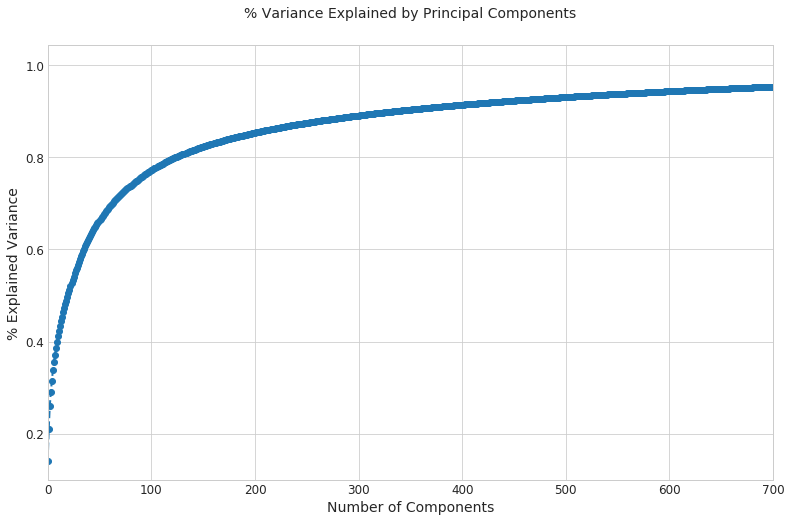

In [92]:
sns.set_style('whitegrid')
plt.figure(1, figsize=(13, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.xlim([0,700])
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.show()

#### Does not make a lot of sense to test PCA, as we will be working with higher number of features than with feature selection.

In [94]:
pca=PCA(n_components=335,whiten=True,random_state=0)
X_pca_21=pca.fit_transform(scaled_X)
print("Variance explained using 335 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 335 components is: 0.899473140254


In [95]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_21,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [96]:
## Table to store training and test measures so we can compare later
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='3.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [97]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.937153065782


Predicted  False  True  __all__
Actual                         
False      25979  1819    27798
True         151  3397     3548
__all__    26130  5216    31346

The accuracy of the model on test data is: 0.926630088044


Predicted  False  True  __all__
Actual                         
False       6482   462     6944
True         113   780      893
__all__     6595  1242     7837

#### <a id='3.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [98]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.940247559497


Predicted  False  True  __all__
Actual                         
False      26040  1758    27798
True         115  3433     3548
__all__    26155  5191    31346

The accuracy of the model on test data is: 0.930840882991


Predicted  False  True  __all__
Actual                         
False       6520   424     6944
True         118   775      893
__all__     6638  1199     7837

#### <a id='3.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [99]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.942799719262


Predicted  False  True  __all__
Actual                         
False      26048  1750    27798
True          43  3505     3548
__all__    26091  5255    31346

The accuracy of the model on test data is: 0.931351282378


Predicted  False  True  __all__
Actual                         
False       6519   425     6944
True         113   780      893
__all__     6632  1205     7837

In [100]:
table_80_70_test['index']=indx
table_80_70_train['index']=indx

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_70_train)
print("\nTest Set")
display(table_80_70_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.937153,3397.0,25979.0,1819.0,151.0,0.065436,0.042559
RandomForestClassifier,0.940248,3433.0,26040.0,1758.0,115.0,0.063242,0.032413
ExtraTreeClassifier,0.942800,3505.0,26048.0,1750.0,43.0,0.062954,0.012120



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.926630,780.0,6482.0,462.0,113.0,0.066532,0.126540,0.903464
RandomForestClassifier,0.930841,775.0,6520.0,424.0,118.0,0.061060,0.132139,0.903401
ExtraTreeClassifier,0.931351,780.0,6519.0,425.0,113.0,0.061204,0.126540,0.906128


#### Lets try using oversampling (SMOTE technique) to see if we can improve the results

### <a id='4' style="text-decoration : none; color : #000000;"> 4. Oversampling</a>

In [102]:
columns=df_sel.columns[df_sel.columns!='Target'].values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['dom_function_document.getElementsByTagName(',
 'dom_function_document.createElement(',
 'js_function_.getTime(',
 'dom_function_window.addEventListener(',
 'js_function_.split(',
 'js_function_Math.random(',
 'js_function_.setTime(',
 'js_function_.replace(',
 'js_function_.indexOf(',
 'js_function_Math.floor(',
 'js_function_decodeURIComponent(',
 'js_function_.match(',
 'js_function_JSON.parse(',
 'js_function_.pop(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_encodeURIComponent(',
 'js_function_.test(',
 'js_function_.apply(',
 'js_function_.substr',
 'script_src_.js',
 'script_count',
 'script_src_relative',
 'script_src_absolute',
 'script_src_https',
 'script_async_true',
 'link_rel_canonical',
 'div_count',
 'script_type_text/javascript',
 'script_src_out_of_domain',
 'iframe_count',
 'a_count',
 'a_href_relative',
 'a_href_absolute',
 'a_href_out_of_domain',
 'img_count',
 'meta_http-equiv_X-UA-Compatible',
 'link_href_https',
 'img_src_relative',
 'img_s

In [103]:
### Preparing our training and test sets
X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

The train/test split ratio is 80:20


In [104]:
## Table to store training and test measures so we can compare later
table_80_80_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_80_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='4.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [105]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.94507412205


Predicted  False   True  __all__
Actual                          
False      25555   2237    27792
True         816  26976    27792
__all__    26371  29213    55584

The accuracy of the model on test data is: 0.911318106418


Predicted  False  True  __all__
Actual                         
False       6335   615     6950
True          80   807      887
__all__     6415  1422     7837

#### <a id='4.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [106]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.96678900403


Predicted  False   True  __all__
Actual                          
False      26049   1743    27792
True         103  27689    27792
__all__    26152  29432    55584

The accuracy of the model on test data is: 0.924971290034


Predicted  False  True  __all__
Actual                         
False       6449   501     6950
True          87   800      887
__all__     6536  1301     7837

In [107]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_count,0.212891
script_count,0.128964
script_src_.js,0.127355
a_href_out_of_domain,0.083953
script_type_text/javascript,0.061452
a_href_relative,0.054713
iframe_count,0.041291
script_src_https,0.023918
http_header_content-length,0.023664
http_header_cache-control_set_max-age,0.012265


#### <a id='4.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [108]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9676345711


Predicted  False   True  __all__
Actual                          
False      26068   1724    27792
True          75  27717    27792
__all__    26143  29441    55584

The accuracy of the model on test data is: 0.925864488963


Predicted  False  True  __all__
Actual                         
False       6455   495     6950
True          86   801      887
__all__     6541  1296     7837

In [109]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_transfer-encoding_chunked,0.123808
http_header_content-encoding_gzip,0.086736
http_header_vary_accept-encoding,0.073552
script_src_.js,0.047233
http_header_content-language_text/html,0.046373
http_header_server_apache,0.041138
http_header_vary_accept,0.039185
script_src_relative,0.034735
http_header_server_nginx,0.030204
script_type_text/javascript,0.027672


In [115]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [112]:
table_80_80_test['index']=indx
table_80_80_train['index']=indx

table_80_80_test.set_index(['index'],drop=True,inplace=True)
table_80_80_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_80_train)
print("\nTest Set")
display(table_80_80_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.945074,26976.0,25555.0,2237.0,816.0,0.080491,0.029361
RandomForestClassifier,0.966789,27689.0,26049.0,1743.0,103.0,0.062716,0.003706
ExtraTreeClassifier,0.967635,27717.0,26068.0,1724.0,75.0,0.062032,0.002699



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.911318,807.0,6335.0,615.0,80.0,0.088489,0.090192,0.910660
RandomForestClassifier,0.924971,800.0,6449.0,501.0,87.0,0.072086,0.098083,0.914915
ExtraTreeClassifier,0.925864,801.0,6455.0,495.0,86.0,0.071223,0.096956,0.915910


### <a id='5' style="text-decoration : none; color : #000000;"> 5. Undersampling</a>

In [118]:
df_non=df_sel[df_sel.Target==0]
df_mal=df_sel[df_sel.Target==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)

X=df_u[columns]
y=df_u.Target.values

feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (8882, 65)


,dom_function_document.getElementsByTagName(,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,http_header_marco_contenttext,http_header_x-cintent-type-options_nosniff,http_header_strict-transport-security_max-age,http_header_content-length,http_header_content-encoding_gzip,http_header_content-language_text/html,http_header_vary_accept,http_header_vary_accept-encoding,http_header_connection_keep-alive,http_header_transfer-encoding_chunked,http_header_cache-control_set_max-age,http_header_server_nginx,http_header_x-xss-enabled,http_header_cache-control_set_private,http_header_expect-ctmax-age,http_header_expect-ctreport-uri,http_header_cache-control_set_must-revalidate,http_header_via_1.1,http_header_cache-control_set_no-cache,http_header_cache-control_set_public,http_header_cache-control_set_no-store,http_header_pragmano-cache,http_header_server_apache,http_header_connection_close,Target
domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
apost.com,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,44.0,26.0,26.0,26.0,44.0,0.0,99.0,32.0,6.0,17.0,96.0,93.0,93.0,88.0,14.0,1.0,13.0,4.0,4.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1c.ru,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,13.0,7.0,7.0,1.0,2.0,0.0,85.0,4.0,5.0,0.0,133.0,133.0,132.0,117.0,21.0,0.0,0.0,21.0,21.0,1.0,0.0,1.0,0.0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
echo24.cz,3.0,2.0,0.0,0.0,1.0,0.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,40.0,25.0,25.0,25.0,16.0,0.0,299.0,11.0,4.0,12.0,289.0,288.0,288.0,222.0,110.0,1.0,9.0,110.0,110.0,1.0,0.0,0.0,26368.0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
dimora.jp,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,32.0,28.0,28.0,4.0,7.0,0.0,435.0,18.0,21.0,8.0,177.0,177.0,25.0,21.0,75.0,0.0,0.0,75.0,75.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
slashgear.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,29.0,26.0,26.0,26.0,19.0,1.0,144.0,19.0,8.0,14.0,157.0,157.0,156.0,148.0,22.0,1.0,16.0,22.0,22.0,1.0,0.0,0.0,7600.0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [119]:
class_bal(df_u)

In [121]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

## Table to store training and test measures so we can compare later
table_80_90_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_90_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

The train/test split ratio is 80:20


#### <a id='5.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [122]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.935256861365


Predicted  False  True  __all__
Actual                         
False       3194   353     3547
True         107  3451     3558
__all__     3301  3804     7105

The accuracy of the model on test data is: 0.917276308385


Predicted  False  True  __all__
Actual                         
False        798    96      894
True          51   832      883
__all__      849   928     1777

#### <a id='5.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [123]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.961154116819


Predicted  False  True  __all__
Actual                         
False       3307   240     3547
True          36  3522     3558
__all__     3343  3762     7105

The accuracy of the model on test data is: 0.920652785594


Predicted  False  True  __all__
Actual                         
False        819    75      894
True          66   817      883
__all__      885   892     1777

In [124]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_count,0.217172
script_src_.js,0.132431
script_count,0.131315
a_href_out_of_domain,0.092271
script_type_text/javascript,0.062822
a_href_relative,0.043932
iframe_count,0.040166
http_header_content-length,0.025233
script_src_https,0.025027
div_count,0.016727


#### <a id='5.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [130]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.964954257565


Predicted  False  True  __all__
Actual                         
False       3313   234     3547
True          15  3543     3558
__all__     3328  3777     7105

The accuracy of the model on test data is: 0.920090039392


Predicted  False  True  __all__
Actual                         
False        820    74      894
True          68   815      883
__all__      888   889     1777

In [126]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_transfer-encoding_chunked,0.117575
script_src_.js,0.113321
http_header_vary_accept-encoding,0.065052
http_header_content-encoding_gzip,0.061584
http_header_marco_contenttext,0.050403
script_src_relative,0.044676
http_header_vary_accept,0.039021
a_href_relative,0.034961
script_async_true,0.029839
script_src_https,0.026811


In [127]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [128]:
table_80_90_test['index']=indx
table_80_90_train['index']=indx

table_80_90_test.set_index(['index'],drop=True,inplace=True)
table_80_90_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_90_train)
print("\nTest Set")
display(table_80_90_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.935257,3451.0,3194.0,353.0,107.0,0.099521,0.030073
RandomForestClassifier,0.961154,3522.0,3307.0,240.0,36.0,0.067663,0.010118
ExtraTreeClassifier,0.964954,3543.0,3313.0,234.0,15.0,0.065971,0.004216



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.917276,832.0,798.0,96.0,51.0,0.107383,0.057758,0.917430
RandomForestClassifier,0.920653,817.0,819.0,75.0,66.0,0.083893,0.074745,0.920681
ExtraTreeClassifier,0.920090,815.0,820.0,74.0,68.0,0.082774,0.077010,0.920108


In [193]:
## Original Creator : Darshan Bhansali
## HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')

In [26]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4,5]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


# from sklearn.model_selection import RandomizedSearchCV

# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# rf_random.fit(X_train, Y_train)

# rf_random.best_params_

# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = accuracy_score(test_labels,predictions)
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
#     return accuracy

# base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
# base_model.fit(X_train, Y_train)
# base_accuracy = evaluate(base_model, X_test, Y_test)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test, Y_test)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

# rf_random.best_params_

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110,70,50],
#     'max_features': ['sqrt','log2'],
#     'min_samples_leaf': [3, 4, 5,2],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

# rf=RandomForestClassifier(random_state=0)
# rf.fit(X_train,Y_train)
# acc_train=rf.score(X_train,Y_train)
# print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
# cm_train=get_cm(rf,X_train,Y_train)
# display(cm_train)
# acc_test=accuracy_score(Y_test,rf.predict(X_test))
# print("The accuracy of the model on test data is:",acc_test)
# cm_test=get_cm(rf,X_test,Y_test)
# display(cm_test)
# fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
# auc=metrics.auc(fpr, tpr)

# table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
# table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

### <a id='6' style="text-decoration : none; color : #000000;"> 6. With Cookies</a>

In [3]:
df_js=pd.read_csv('Javascript.csv',low_memory=False,index_col='domain')

# cookie=[col for col in df_js.columns if 'number' in col]

df_js.rename(columns={'Malicious':'Target'},inplace=True)

# df_js.drop(cookie,axis=1,inplace=True)

print("Shape of our dataset:",df_js.shape)



Shape of our dataset: (43294, 407)


In [4]:
df_http=pd.read_csv('HTTP.csv',index_col='domain')

display(df_http.head())

print("Shape of our dataset:",df_http.shape)


df_html=pd.read_csv('HTML.csv',index_col='domain')
df_html.drop(['Unnamed: 0'],axis=1,inplace=True)
print("Shape of our dataset:",df_html.shape)



,Target,http_header-access-control-origin_http:,http_header-access-control-origin_https:,http_header_access-control-allow-credentials,http_header_access-control-allow-methods_cancelupload,http_header_access-control-allow-methods_checkin,http_header_access-control-allow-methods_connect,http_header_access-control-allow-methods_debug,http_header_access-control-allow-methods_delete,http_header_access-control-allow-methods_get,http_header_access-control-allow-methods_head,http_header_access-control-allow-methods_link,http_header_access-control-allow-methods_mkcol,http_header_access-control-allow-methods_move,http_header_access-control-allow-methods_options,http_header_access-control-allow-methods_patch,http_header_access-control-allow-methods_post,http_header_access-control-allow-methods_propfind,http_header_access-control-allow-methods_prpatch,http_header_access-control-allow-methods_put,http_header_access-control-allow-methods_report,http_header_access-control-allow-methods_should,http_header_access-control-allow-methods_trace,http_header_access-control-allow-methods_unlink,http_header_access-control-allow-methods_update,http_header_access-control-custom_count,http_header_access-control-expose-headers_set_true,http_header_access-control-expose-total_count,http_header_access-control-max-age,http_header_cache-control_set_max-age,http_header_cache-control_set_must-revalidate,http_header_cache-control_set_no-cache,http_header_cache-control_set_no-store,http_header_cache-control_set_no-transform,http_header_cache-control_set_private,http_header_cache-control_set_proxy-revalidate,http_header_cache-control_set_public,http_header_cache-control_set_s-maxage,http_header_connection_close,http_header_connection_keep-alive,http_header_content-disposition_attachment,http_header_content-disposition_inline,http_header_content-encoding_br,http_header_content-encoding_compress,http_header_content-encoding_deflate,http_header_content-encoding_gzip,http_header_content-encoding_identify,http_header_content-language_aa,http_header_content-language_ae,http_header_content-language_af,http_header_content-language_ak,http_header_content-language_am,http_header_content-language_an,http_header_content-language_application/*,http_header_content-language_application/ecmascript,http_header_content-language_application/json,http_header_content-language_application/octet-stream,http_header_content-language_ar,http_header_content-language_as,http_header_content-language_audio/*,http_header_content-language_audio/mpeg,http_header_content-language_audio/ogg,http_header_content-language_av,http_header_content-language_ay,http_header_content-language_az,http_header_content-language_ba,http_header_content-language_be,http_header_content-language_bg,http_header_content-language_bh,http_header_content-language_bi,http_header_content-language_blocked-uri,http_header_content-language_bm,http_header_content-language_bn,http_header_content-language_bo,http_header_content-language_br,http_header_content-language_bs,http_header_content-language_ca,http_header_content-language_ce,http_header_content-language_ch,http_header_content-language_co,http_header_content-language_cr,http_header_content-language_cs,http_header_content-language_cu,http_header_content-language_cv,http_header_content-language_cy,http_header_content-language_da,http_header_content-language_de,http_header_content-language_disposition,http_header_content-language_document-uri,http_header_content-language_dv,http_header_content-language_dz,http_header_content-language_ee,http_header_content-language_effective-directive,http_header_content-language_el,http_header_content-language_en,http_header_content-language_eo,http_header_content-language_es,http_header_content-language_et,http_header_content-language_eu,http_header_content-language_fa,http_header_content-language_ff,http_header_content-language_fi,http_header_content-language_fj,http_header_content-language_fo,http_header_content-language_fr,http_header_co

Shape of our dataset: (45856, 672)
Shape of our dataset: (43491, 1461)


In [5]:
col_js_no_uni=remove_feat(df_js)
col_html_no_uni=remove_feat(df_html)
col_http_no_uni=remove_feat(df_http)
df_js.drop(col_js_no_uni,axis=1,inplace=True)
df_html.drop(col_html_no_uni,axis=1,inplace=True)
df_http.drop(col_http_no_uni,axis=1,inplace=True)

In [6]:
col_js_95=uni_value(df_js)
col_html_95=uni_value(df_html)
col_http_95=uni_value(df_http)
### Lets drop those columns
df_js.drop(col_js_95[col_js_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

df_html.drop(col_html_95[col_html_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

df_http.drop(col_http_95[col_http_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

In [7]:
cat_var_js,num_var_js=check_cat(df_js)
cat_var_http,num_var_http=check_cat(df_http)
cat_var_html,num_var_html=check_cat(df_html)

In [8]:
df_js.Target=df_js.Target.apply(lambda x: 1 if x=='Malicious' else 0)
df_html.Target=df_html.Target.apply(lambda x: 1 if x=='Malicious' else 0)
df_http.Target=df_http.Target.apply(lambda x: 1 if x=='Malicious' else 0)

In [10]:
num_stats_js=num_stats(df_js,num_var_js)
cat_stats_js=cat_stats(df_js,cat_var_js)


num_stats_html=num_stats(df_html,num_var_html)
cat_stats_html=cat_stats(df_html,cat_var_html)

num_stats_http=num_stats(df_http,num_var_http)
cat_stats_http=cat_stats(df_http,cat_var_http)

In [11]:
fin_col=num_stats_js.index.values[0:20].tolist()+cat_stats_js.index.values[0:20].tolist() + num_stats_html.index.values[0:20].tolist()+cat_stats_html.index.values[0:20].tolist() + num_stats_http.index.values[0:20].tolist()+cat_stats_http.index.values[0:20].tolist()

In [12]:
df_int=pd.merge(df_js,df_html,left_index=True,right_index=True)

df=pd.merge(df_int,df_http,left_index=True,right_index=True)

df['Target']=df[['Target_x','Target_y','Target']].apply(max,axis=1)

In [13]:
fin_col.append('Target')

df_sel=df[fin_col]

display(df_sel.shape)
df_sel.head()

(39183, 65)

,number_of_cookies,number_of_unsecure_cookies,number_of_non_http_only_cookies,dom_function_document.getElementsByTagName(,number_of_http_only_cookies,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,number_of_secure_cookies,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,number_functions_declared,js_function_JSON.parse(,js_function_.pop(,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,http_header_marco_contenttext,http_header_x-cintent-type-options_nosniff,http_header_strict-transport-security_max-age,http_header_content-length,http_header_content-encoding_gzip,http_header_content-language_text/html,http_header_vary_accept,http_header_vary_accept-encoding,http_header_connection_keep-alive,http_header_transfer-encoding_chunked,http_header_cache-control_set_max-age,http_header_server_nginx,http_header_x-xss-enabled,http_header_cache-control_set_private,http_header_expect-ctmax-age,http_header_expect-ctreport-uri,http_header_cache-control_set_must-revalidate,http_header_via_1.1,http_header_cache-control_set_no-cache,http_header_cache-control_set_public,http_header_cache-control_set_no-store,http_header_pragmano-cache,http_header_server_apache,http_header_connection_close,Target
domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
h83.turdizi.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,8.0,8.0,1.0,4.0,0.0,17.0,4.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
hbgv.wivela.com,6.0,6.0,6.0,3.0,0.0,4.0,4.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,87.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
nus.edu.sg,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,24.0,0.0,0.0,13.0,25.0,19.0,19.0,0.0,2.0,0.0,256.0,22.0,18.0,0.0,167.0,157.0,157.0,147.0,29.0,1.0,0.0,29.0,29.0,1.0,0.0,0.0,10025.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0
arabwebpage.com,4.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,9.0,19.0,10.0,10.0,10.0,12.0,1.0,156.0,9.0,2.0,2.0,170.0,170.0,167.0,167.0,42.0,0.0,13.0,42.0,42.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
moscatalogue.net,5.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,11.0,5.0,5.0,5.0,3.0,1.0,270.0,0.0,2.0,1.0,127.0,127.0,127.0,127.0,46.0,1.0,22.0,46.0,46.0,1.0,1.0,1.0,0.0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [14]:
X=df_sel.iloc[:,df_sel.columns!='Target'].values
y=df_sel.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [15]:
columns=df_sel.columns[df_sel.columns!='Target'].values

In [16]:
columns

array(['number_of_cookies', 'number_of_unsecure_cookies',
       'number_of_non_http_only_cookies',
       'dom_function_document.getElementsByTagName(',
       'number_of_http_only_cookies',
       'dom_function_document.createElement(', 'js_function_.getTime(',
       'dom_function_window.addEventListener(', 'number_of_secure_cookies',
       'js_function_.split(', 'js_function_Math.random(',
       'js_function_.setTime(', 'js_function_.replace(',
       'js_function_.indexOf(', 'js_function_Math.floor(',
       'js_function_decodeURIComponent(', 'js_function_.match(',
       'number_functions_declared', 'js_function_JSON.parse(',
       'js_function_.pop(', 'script_src_.js', 'script_count',
       'script_src_relative', 'script_src_absolute', 'script_src_https',
       'script_async_true', 'link_rel_canonical', 'div_count',
       'script_type_text/javascript', 'script_src_out_of_domain',
       'iframe_count', 'a_count', 'a_href_relative', 'a_href_absolute',
       'a_href_out_of_

In [17]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='6.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [18]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.928029094621


Predicted  False  True  __all__
Actual                         
False      25914  1878    27792
True         378  3176     3554
__all__    26292  5054    31346

The accuracy of the model on test data is: 0.918336097997


Predicted  False  True  __all__
Actual                         
False       6439   511     6950
True         129   758      887
__all__     6568  1269     7837

#### <a id='6.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [20]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.94315064123


Predicted  False  True  __all__
Actual                         
False      26090  1702    27792
True          80  3474     3554
__all__    26170  5176    31346

The accuracy of the model on test data is: 0.928288886053


Predicted  False  True  __all__
Actual                         
False       6491   459     6950
True         103   784      887
__all__     6594  1243     7837

In [21]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
script_count,0.094683
a_count,0.093579
script_src_.js,0.087007
div_count,0.081439
number_of_non_http_only_cookies,0.066104
http_header_content-length,0.058756
a_href_out_of_domain,0.054436
http_header_server_apache,0.046258
script_type_text/javascript,0.043769
number_of_cookies,0.028088


#### <a id='6.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier </a>

In [22]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.94477764308


Predicted  False  True  __all__
Actual                         
False      26098  1694    27792
True          37  3517     3554
__all__    26135  5211    31346

The accuracy of the model on test data is: 0.927523286972


Predicted  False  True  __all__
Actual                         
False       6482   468     6950
True         100   787      887
__all__     6582  1255     7837

In [23]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
http_header_transfer-encoding_chunked,0.075230
http_header_content-encoding_gzip,0.071656
http_header_server_apache,0.050452
http_header_content-length,0.049227
http_header_content-language_text/html,0.048012
script_src_.js,0.038181
number_of_cookies,0.036473
http_header_marco_contenttext,0.034570
http_header_server_nginx,0.033546
script_src_relative,0.030246


In [24]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [25]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_50_train)
print("\nTest Set")
display(table_80_50_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.928029,3176.0,25914.0,1878.0,378.0,0.067573,0.106359
RandomForestClassifier,0.943151,3474.0,26090.0,1702.0,80.0,0.061241,0.022510
ExtraTreeClassifier,0.944778,3517.0,26098.0,1694.0,37.0,0.060953,0.010411



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.918336,758.0,6439.0,511.0,129.0,0.073525,0.145434,0.890520
RandomForestClassifier,0.928289,784.0,6491.0,459.0,103.0,0.066043,0.116122,0.908918
ExtraTreeClassifier,0.927523,787.0,6482.0,468.0,100.0,0.067338,0.112740,0.909961
